# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## 2. LOF task – Srinath Jayaraman
For this individual assignment we're gonna test the performance of the LocalOutlierFactor (LOF) with different distance metrics and algorithms (kdtree, balltree)

The following steps will be made
* 2.1 Determine the number of neighbours based upon the training set
* 2.2 Investigate the detected outliers

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib as plt
from collections import Counter
import matplotlib.pyplot as plt
import bisect
import random
import re

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import plot_roc_curve, precision_recall_fscore_support, confusion_matrix

import datetime as datetime
import time
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("C:/Users/srina/OneDrive/Documents/Masters/Year 2/Q4/CS4035 - Cyber Data Analytics/Labs/Lab 2/SWaT_train.csv")
df_test = pd.read_csv("C:/Users/srina/OneDrive/Documents/Masters/Year 2/Q4/CS4035 - Cyber Data Analytics/Labs/Lab 2/SWaT_test.csv")

df_train = df_train.rename(columns={'Normal/Attack' : 'Label'})
df_test = df_test.rename(columns={'Normal/Attack' : 'Label'})

df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_train.drop(' Timestamp', axis=1, inplace=True)
df_test.drop(' Timestamp', axis=1, inplace=True)

In [4]:
df_train.rename(columns=lambda x: x.strip(), inplace=True)
df_test.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
df_train_x = df_train.drop('Label', axis=1, inplace=False)
df_test_x = df_test.drop('Label', axis=1, inplace=False)

df_train_y = pd.Series(LabelEncoder().fit_transform(df_train.Label).astype('int8'))
df_test_y = pd.Series(LabelEncoder().fit_transform(df_test.Label).astype('int8'))

Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 998 µs
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns


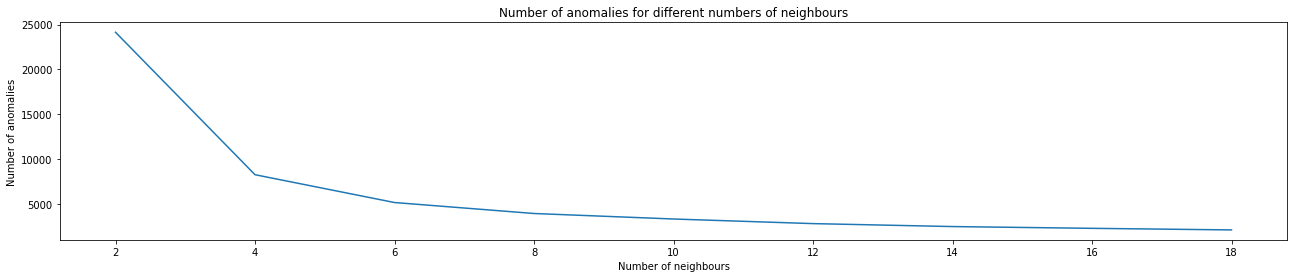

In [6]:
detected_anomalies = []

for neighbours in range(2,20,2):
    classifier = LocalOutlierFactor(n_neighbors=neighbours, algorithm='kd_tree', metric='chebyshev')
    y_pred = classifier.fit_predict(df_train_x) #LocalOutlierFactor supports only fit_predict according to scikit learn docs
    %time
    errors = (y_pred != 1).sum()
    detected_anomalies.append((neighbours,errors))
    
f, (ax1) = plt.subplots(1,1,figsize =(22, 4))
plt.plot([item[0] for item in detected_anomalies], [item[1] for item in detected_anomalies])

plt.title('Number of anomalies for different numbers of neighbours')
plt.ylabel('Number of anomalies')
plt.xlabel('Number of neighbours')

plt.show()

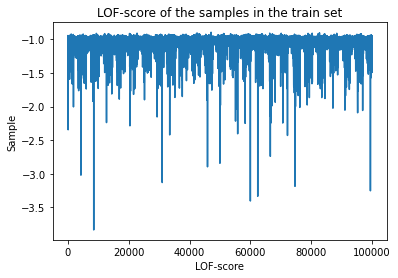

In [11]:
df_train_x_short = df_train_x[100000:200000] #testing on a shortened dataset to save time. And the signals are all super cyclic, so adding more examples won't change much
# in our opinion
LOF_number_of_neighbours = 10
clf = LocalOutlierFactor(n_neighbors=LOF_number_of_neighbours, algorithm='kd_tree', novelty=True)
clf.fit(df_train_x_short)

#Here we have used negative_outlier_factor_ - a quick explanation follows
#The opposite LOF of the training samples. The higher, the more normal. 
#Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), 
#while outliers tend to have a larger LOF score. 
#Taken from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

train_scores = clf.negative_outlier_factor_ 

#clf.predict(df_test_x)

#test_scores = clf.score_samples(df_test_x)
 
f, ax = plt.subplots()

ax.plot(train_scores)

ax.title.set_text('LOF-score of the samples in the train set')

ax.set_ylabel('Sample')

ax.set_xlabel('LOF-score')

plt.show()